Results from replication of ITU study on breastdata

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
current_directory = os.environ['HOME']
image_size = 256

#model_name_ImgNet = "Mei_repli_ResNet50_ImgNet"
#model_name_RadNet = "Mei_repli_ResNet50_RadNet"
#lr = 0.0001 

# Mei Pretrained on RadImageNet

## Training summary:

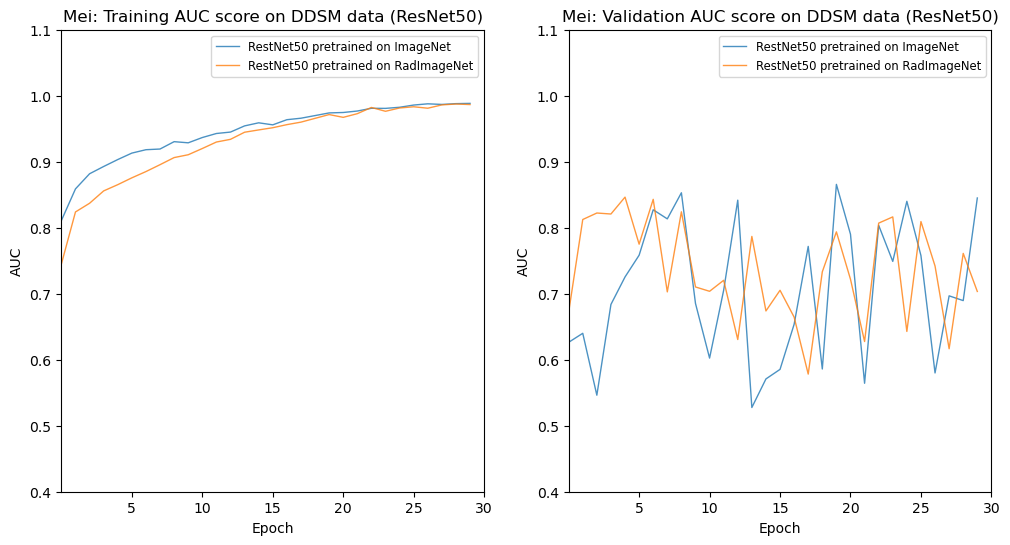

In [37]:
#Mei
#ImageNet
ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreImgNet/training_history/Eks2_Mei_ResNet50_ImgNet.csv")
ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)

#RadImageNet
RadImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreRadNet/training_history/Eks2_Mei_ResNet50_RadNet.csv")
RadImgNetLoss_df = pd.read_csv(RadImgNetLoss_path)


#Training:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
_xlim = [0.001,30]
_ylim = [0.4,1.1]
ax1.plot(ImgNetLoss_df['train_auc'],
        label=r"RestNet50 pretrained on ImageNet",
        lw=1,
        alpha=0.8,
        )
ax1.plot(RadImgNetLoss_df['train_auc'],
        label=r"RestNet50 pretrained on RadImageNet",
        lw=1,
        alpha=0.8,
        )

ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'AUC',
        title = 'Mei: Training AUC score on DDSM data (ResNet50)',
    )
ax1.legend(loc="best",fontsize='small')

#Validation:
ax2.plot(ImgNetLoss_df['val_auc'],
        label=r"RestNet50 pretrained on ImageNet",
        lw=1,
        alpha=0.8,
        )

ax2.plot(RadImgNetLoss_df['val_auc'],
        label=r"RestNet50 pretrained on RadImageNet",
        lw=1,
        alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'AUC',
        title = 'Mei: Validation AUC score on DDSM data (ResNet50)',
    )
ax2.legend(loc="best",fontsize='small')

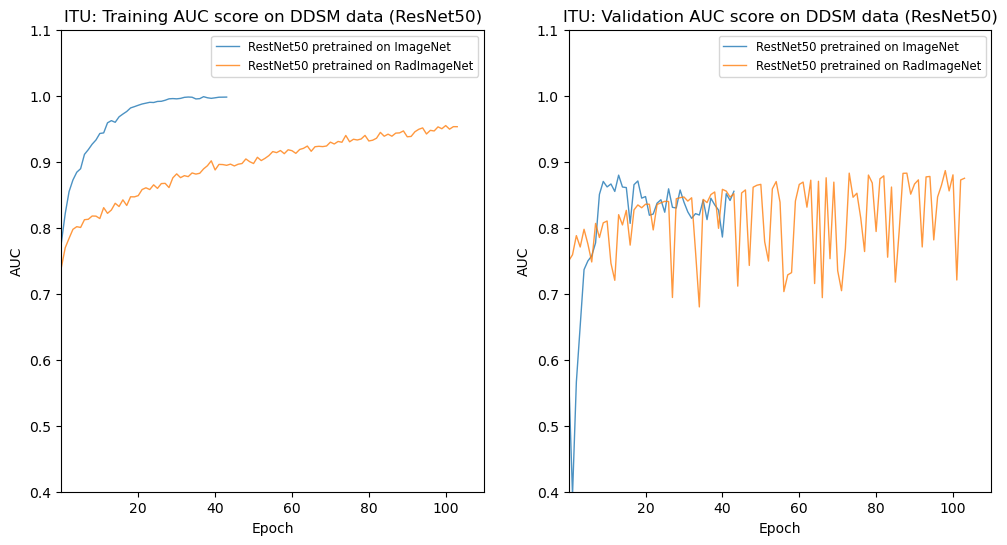

In [42]:
#ITU
#ImageNet
ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/pretrained_ImgNet/freezing_round2/pretrained_ImageNet/training_history/Eks2_ITU_ResNet50_ImgNet_round2.csv")
ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)

#RadImageNet
RadImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/pretrained_RadNet/freezing_round2/pretrained_RadNet/training_history/Eks2_ITU_ResNet50_RadNet_round2.csv")
RadImgNetLoss_df = pd.read_csv(RadImgNetLoss_path)


#Training:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
_xlim = [0.001,110]
_ylim = [0.4,1.1]
ax1.plot(ImgNetLoss_df['train_auc'],
        label=r"RestNet50 pretrained on ImageNet",
        lw=1,
        alpha=0.8,
        )
ax1.plot(RadImgNetLoss_df['train_auc'],
        label=r"RestNet50 pretrained on RadImageNet",
        lw=1,
        alpha=0.8,
        )

ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'AUC',
        title = 'ITU: Training AUC score on DDSM data (ResNet50)',
        )
ax1.legend(loc="best",fontsize='small')

#Validation:
ax2.plot(ImgNetLoss_df['val_auc'],
        label=r"RestNet50 pretrained on ImageNet",
        lw=1,
        alpha=0.8,
        )

ax2.plot(RadImgNetLoss_df['val_auc'],
        label=r"RestNet50 pretrained on RadImageNet",
        lw=1,
        alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'AUC',
        title = 'ITU: Validation AUC score on DDSM data (ResNet50)',
        )
ax2.legend(loc="best",fontsize='small')

# Test

____________________________________________________________
Mei trainingstrategy for finetuning
Found 540 validated image filenames belonging to 2 classes.


____________________________________________________________
ResNet50 pretrained on ImageNet performance on DDSM test set:
Correct: 418/540 (77.407%)   AUC: 0.872
____________________________________________________________
ResNet50 pretrained on RadImageNet performance on DDSM test set:
Correct: 418/540 (77.407%)   AUC: 0.867


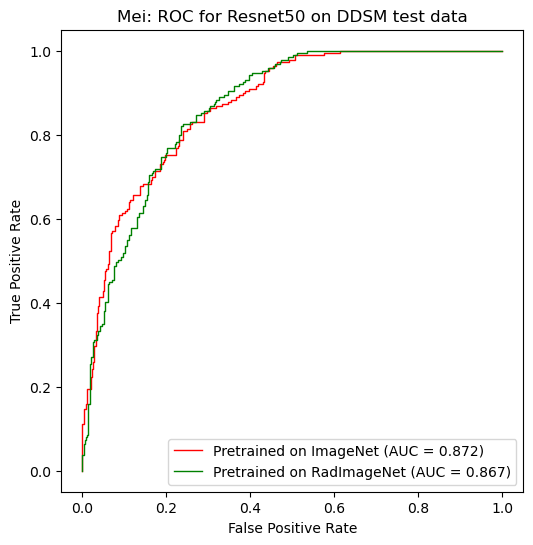

In [92]:
#Mei
print('____________________________________________________________')
print('Mei trainingstrategy for finetuning')

test_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Data/Datasplits/test_pocData.csv")
df_test=pd.read_csv(test_path)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
test_generator = data_generator.flow_from_dataframe(dataframe=df_test,
                                                    directory=current_directory,
                                                    x_col = 'filepath',
                                                    y_col = 'label',
                                                    target_size=(image_size, image_size),
                                                    batch_size=len(df_test),
                                                    shuffle=False,
                                                    seed=726,
                                                    class_mode='categorical')

# #ImageNet:
w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreImgNet/weights/Eks2_Mei_ResNet50_ImgNet.h5")
FT_model = load_model(w_path, compile=False)

y_probs = FT_model.predict(test_generator) #Probabilities
ylabels= test_generator.classes
imgNet_fpr, imgNet_tpr, _ = roc_curve(ylabels, y_probs[:, 1])#calculate roc curve    y_probs[:, 1] # keep probabilities for the positive outcome only
imgNet_auc = auc(imgNet_fpr, imgNet_tpr)# calculate auc
y_pred = tf.math.argmax(y_probs,1) #Predictions
predctions = tf.Variable(y_pred).numpy().tolist()
correct = sum(i == j for (i,j) in zip(predctions,ylabels))
print('____________________________________________________________')
print('ResNet50 pretrained on ImageNet performance on DDSM test set:')
print('Correct: '+str(correct)+'/'+str(len(ylabels))+' ('+str(round(correct/len(ylabels)*100,3))+'%)   AUC:',round(imgNet_auc,3))

del FT_model

#RadImageNet:
w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreRadNet/weights/Eks2_Mei_ResNet50_RadNet.h5")
FT_model = load_model(w_path, compile=False)

y_probs = FT_model.predict(test_generator) #Probabilities
ylabels= test_generator.classes
radNet_fpr, radNet_tpr, _ = roc_curve(ylabels, y_probs[:, 1])#y_probs)# calculate roc curve    y_probs[:, 1] # keep probabilities for the positive outcome only
radNet_auc = auc(radNet_fpr, radNet_tpr)# calculate auc
y_pred = tf.math.argmax(y_probs,1) #Predictions
predctions = tf.Variable(y_pred).numpy().tolist()
correct = sum(i == j for (i,j) in zip(predctions,ylabels))
print('____________________________________________________________')
print('ResNet50 pretrained on RadImageNet performance on DDSM test set:')
print('Correct: '+str(correct)+'/'+str(len(ylabels))+' ('+str(round(correct/len(ylabels)*100,3))+'%)   AUC:',round(radNet_auc,3))

#Hold values for later plot:
mei_imgNet_tpr = imgNet_tpr
mei_imgNet_fpr = imgNet_fpr
mei_imgNet_auc = imgNet_auc
mei_radNet_tpr = radNet_tpr
mei_radNet_fpr = radNet_fpr
mei_radNet_auc = radNet_auc

#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    imgNet_fpr,
    imgNet_tpr,
    color="r",
    label=r"Pretrained on ImageNet (AUC = %0.3f)" % (imgNet_auc),
    lw=1,
    alpha=1,
)
ax.plot(
    radNet_fpr,
    radNet_tpr,
    color="g",
    label=r"Pretrained on RadImageNet (AUC = %0.3f)" % (radNet_auc),
    lw=1,
    alpha=1,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mei: ROC for Resnet50 on DDSM test data",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

____________________________________________________________
ITU training strategy for finetuning
Found 540 validated image filenames belonging to 2 classes.


____________________________________________________________
ResNet50 pretrained on ImageNet performance on DDSM test set:
Correct: 493/540 (91.296%)   AUC: 0.971
____________________________________________________________
ResNet50 pretrained on RadImageNet performance on DDSM test set:
Correct: 420/540 (77.778%)   AUC: 0.859


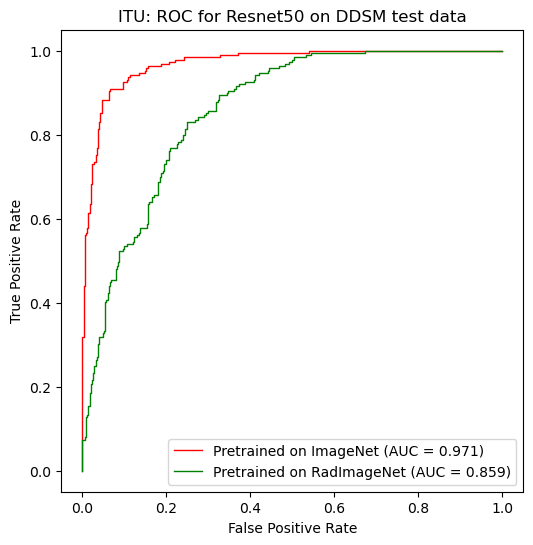

In [93]:
#ITU
print('____________________________________________________________')
print('ITU training strategy for finetuning')

test_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Data/Datasplits/test_pocData.csv")
df_test=pd.read_csv(test_path)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
test_generator = data_generator.flow_from_dataframe(dataframe=df_test,
                                                    directory=current_directory,
                                                    x_col = 'filepath',
                                                    y_col = 'label',
                                                    target_size=(image_size, image_size),
                                                    batch_size=len(df_test),
                                                    shuffle=False,
                                                    seed=726,
                                                    class_mode='categorical')

# #ImageNet:
w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/pretrained_ImgNet/freezing_round2/pretrained_ImageNet/weights/Eks2_ITU_ResNet50_ImgNet_round2.h5")
FT_model = load_model(w_path, compile=False)

y_probs = FT_model.predict(test_generator) #Probabilities
ylabels= test_generator.classes
imgNet_fpr, imgNet_tpr, _ = roc_curve(ylabels, y_probs[:, 1])#calculate roc curve    y_probs[:, 1] # keep probabilities for the positive outcome only
imgNet_auc = auc(imgNet_fpr, imgNet_tpr)# calculate auc
y_pred = tf.math.argmax(y_probs,1) #Predictions
predctions = tf.Variable(y_pred).numpy().tolist()
correct = sum(i == j for (i,j) in zip(predctions,ylabels))
print('____________________________________________________________')
print('ResNet50 pretrained on ImageNet performance on DDSM test set:')
print('Correct: '+str(correct)+'/'+str(len(ylabels))+' ('+str(round(correct/len(ylabels)*100,3))+'%)   AUC:',round(imgNet_auc,3))

del FT_model

#RadImageNet:
w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/pretrained_RadNet/freezing_round2/pretrained_RadNet/weights/Eks2_ITU_ResNet50_RadNet_round2.h5")
FT_model = load_model(w_path, compile=False)

y_probs = FT_model.predict(test_generator) #Probabilities
ylabels= test_generator.classes
radNet_fpr, radNet_tpr, _ = roc_curve(ylabels, y_probs[:, 1])#y_probs)# calculate roc curve    y_probs[:, 1] # keep probabilities for the positive outcome only
radNet_auc = auc(radNet_fpr, radNet_tpr)# calculate auc
y_pred = tf.math.argmax(y_probs,1) #Predictions
predctions = tf.Variable(y_pred).numpy().tolist()
correct = sum(i == j for (i,j) in zip(predctions,ylabels))
print('____________________________________________________________')
print('ResNet50 pretrained on RadImageNet performance on DDSM test set:')
print('Correct: '+str(correct)+'/'+str(len(ylabels))+' ('+str(round(correct/len(ylabels)*100,3))+'%)   AUC:',round(radNet_auc,3))

#Hold values for later plot:
ITU_imgNet_tpr = imgNet_tpr
ITU_imgNet_fpr = imgNet_fpr
ITU_imgNet_auc = imgNet_auc
ITU_radNet_tpr = radNet_tpr
ITU_radNet_fpr = radNet_fpr
ITU_radNet_auc = radNet_auc

#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    imgNet_fpr,
    imgNet_tpr,
    color="r",
    label=r"Pretrained on ImageNet (AUC = %0.3f)" % (imgNet_auc),
    lw=1,
    alpha=1,
)
ax.plot(
    radNet_fpr,
    radNet_tpr,
    color="g",
    label=r"Pretrained on RadImageNet (AUC = %0.3f)" % (radNet_auc),
    lw=1,
    alpha=1,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ITU: ROC for Resnet50 on DDSM test data",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

# Plot with all 4 ROCs

In [1]:
#Plot:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(
    mei_imgNet_fpr,
    mei_imgNet_tpr,
    color="orangered",
    label=r"Mei: Pretrained ImageNet (AUC = %0.3f)" % (mei_imgNet_auc),
    lw=1.7,
    alpha=1,
)
ax.plot(
    mei_radNet_fpr,
    mei_radNet_tpr,
    color="orangered",
    label=r"Mei: Pretrained RadImageNet (AUC = %0.3f)" % (mei_radNet_auc),
    lw=2.2,
    alpha=1,
    linestyle='dotted',
)
ax.plot(
    ITU_imgNet_fpr,
    ITU_imgNet_tpr,
    color="cornflowerblue",
    label=r"Juodelyte: Pretrained ImageNet (AUC = %0.3f)" % (ITU_imgNet_auc),
    lw=1.7,
    alpha=1,
)
ax.plot(
    ITU_radNet_fpr,
    ITU_radNet_tpr,
    color="cornflowerblue",
    label=r"Juodelyte: Pretrained RadImageNet (AUC = %0.3f)" % (ITU_radNet_auc),
    lw=2.2,
    alpha=1,
    linestyle='dotted',
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC for Resnet50 on DDSM test set",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

NameError: name 'plt' is not defined

## Test

Found 540 validated image filenames belonging to 2 classes.


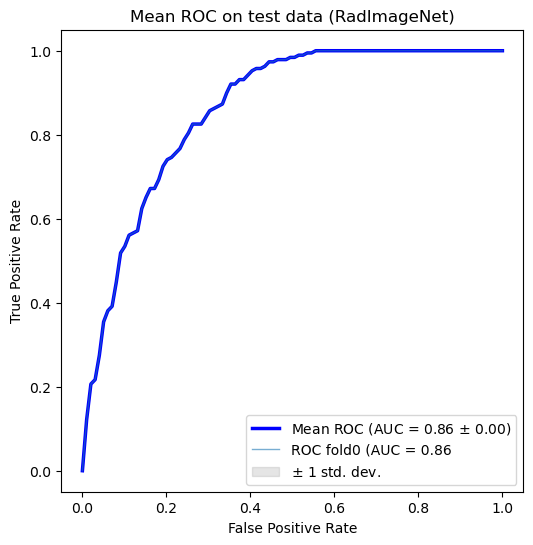

In [19]:
#Plot = RadImageNet
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(1): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Data/Datasplits/test_pocData.csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'filepath',
        y_col = 'label',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Mei/PreRadNet/weights/Eks2_Mei_ResNet50_RadNet.h5")
    FT_model = load_model(w_path, compile=False)

    probs = FT_model.predict(test_generator)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    ylabels = test_generator.classes
    # calculate scores
    _auc = roc_auc_score(ylabels, probs)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(ylabels, probs)
    del FT_model

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(_auc)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
RadImgNet_mean_tpr = mean_tpr
mean_auc = auc(mean_fpr, mean_tpr)
RadImgNet_mean_auc = mean_auc
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)
#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
for j in range(1):
    ax.plot(
        mean_fpr,
        tprs[j],
        #color="b",
        label=r"ROC fold%i (AUC = %0.2f" % (j, aucs[j]),
        lw=1,
        alpha=0.6,
    )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC on test data (RadImageNet)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

# ITU Pretrained on ImageNet

## Training summary:

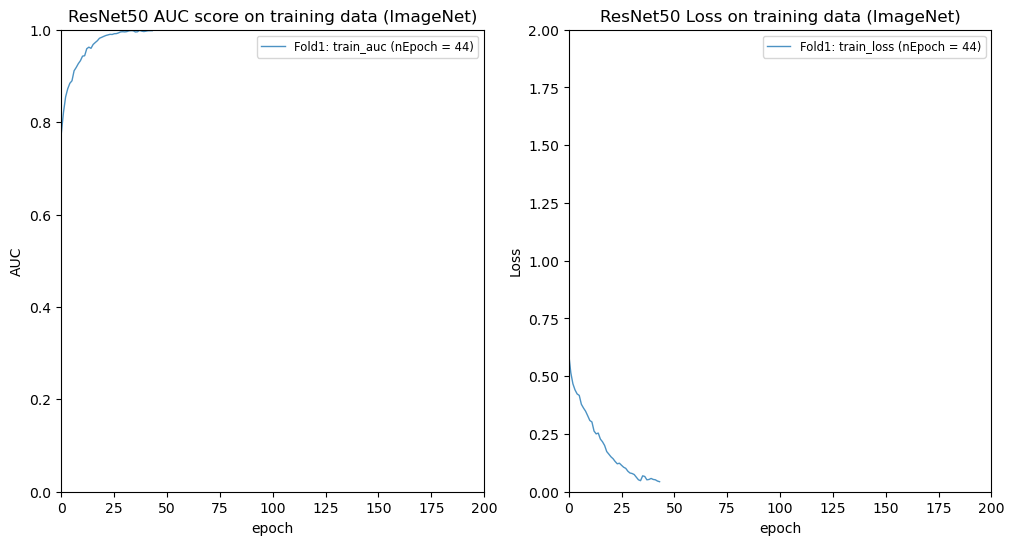

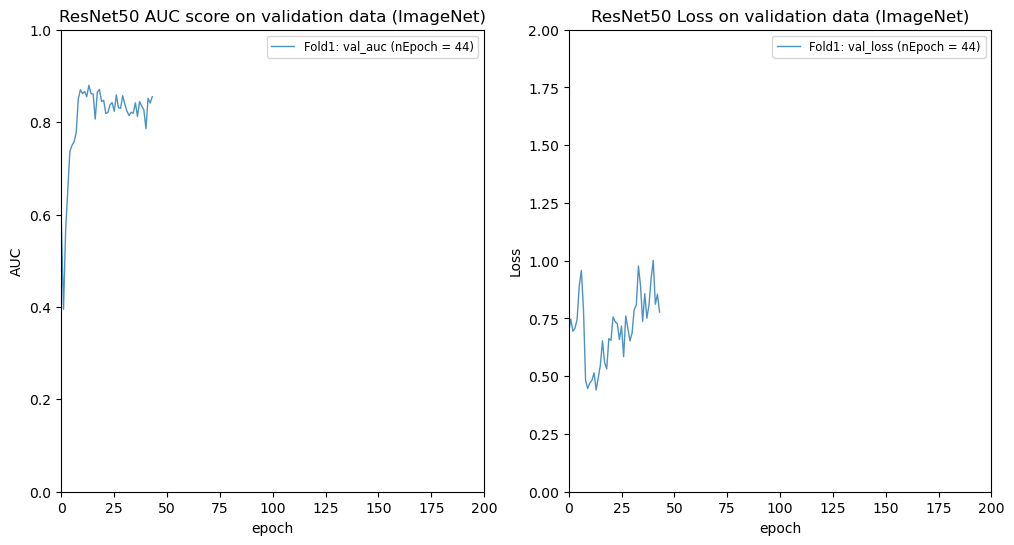

In [11]:
#ImageNet
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (1):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/freezing_round2/pretrained_ImageNet/training_history/Eks2_ITU_ResNet50_ImgNet_round2.csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(1):
        epochs_len = len(train_aucs[i])
        ax1.plot(
            train_aucs[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i+1, "train_auc", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(0,200),
        ylim=(0,1),
        xlabel = 'epoch',
        ylabel = 'AUC',
        title = 'ResNet50 AUC score on training data (ImageNet)',
    )
ax1.legend(loc="best",fontsize='small')

for i in range(1):
        epochs_len = len(train_losses[i])
        ax2.plot(
            train_losses[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i+1, "train_loss", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(0,200),
        ylim=(0, 2),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'ResNet50 Loss on training data (ImageNet)',
    )
ax2.legend(loc="best",fontsize='small')
plt.show()

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(1):
        epochs_len = len(val_aucs[i])
        ax1.plot(
            val_aucs[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i+1, "val_auc", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(0,200),
        ylim=(0, 1),
        xlabel = 'epoch',
        ylabel = 'AUC',
        title = 'ResNet50 AUC score on validation data (ImageNet)',
    )
ax1.legend(loc="best",fontsize='small')

for i in range(1):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            #color="b",
            label=r"Fold%i: %s (nEpoch = %i)" % (i+1, "val_loss", epochs_len),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(0,200),
        ylim=(0, 2),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'ResNet50 Loss on validation data (ImageNet)',
    )
ax2.legend(loc="best",fontsize='small')
plt.show()

## Test

In [12]:
#Pretrained on ImageNet:
model_performace = []
corrrect_list = []
aucs = []
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(1): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Data/Datasplits/test_pocData.csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'filepath',
        y_col = 'label',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/freezing_round2/pretrained_ImageNet/weights/Eks2_ITU_ResNet50_ImgNet_round2.h5")
    FT_model = load_model(w_path, compile=False)
    y_pred = tf.math.argmax(FT_model.predict(test_generator),1)
    predctions = tf.Variable(y_pred).numpy().tolist()
    ylabels= test_generator.classes
    correct = sum(i == j for (i,j) in zip(predctions,ylabels))
    y_probs = FT_model.predict(test_generator) #Needs to be probabilities
    # keep probabilities for the positive outcome only
    y_probs = y_probs[:, 1]
    fpr, tpr, thresholds_keras = roc_curve(ylabels,y_probs)
    _auc = auc(fpr, tpr)
    aucs.append(_auc)
    corrrect_list.append(correct)
    #print('Model from fold',i+1,' Correct: ', correct, ' out of ', len(ylabels), ' (', round(correct/len(ylabels)*100,3),'%)  AUC: ',round(_auc,3))
    model_performace.append(_auc)
    del FT_model
print('_________________________________________________________')
print('ResNet50 pretrained on ImageNet performance on POC test set:')
testsize = len(ylabels)
for i in range(1):
    print('Correct: '+str(corrrect_list[i])+'/'+str(testsize)+' ('+str(round(corrrect_list[i]/testsize*100,3))+'%)   AUC:',round(aucs[i],3))
best_model = model_performace.index(max(model_performace))+1

Found 540 validated image filenames belonging to 2 classes.
_________________________________________________________
ResNet50 pretrained on ImageNet performance on POC test set:
Correct: 493/540 (91.296%)   AUC: 0.971


Found 540 validated image filenames belonging to 2 classes.


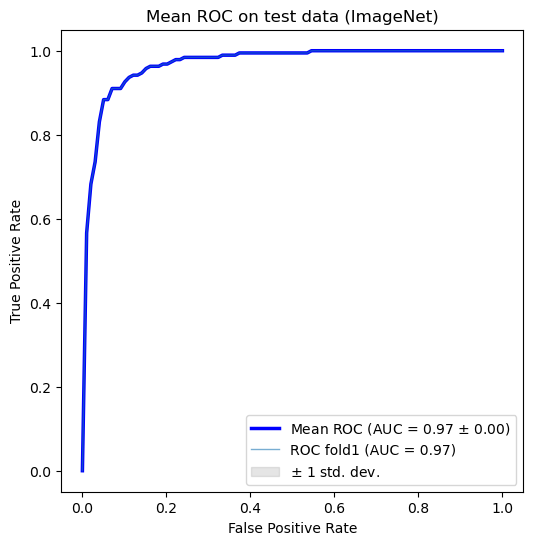

In [13]:
#ImageNet
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(1): 
    test_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/Data/Datasplits/test_pocData.csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'filepath',
        y_col = 'label',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment2/ITU/freezing_round2/pretrained_ImageNet/weights/Eks2_ITU_ResNet50_ImgNet_round2.h5")
    FT_model = load_model(w_path, compile=False)

    probs = FT_model.predict(test_generator)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    ylabels = test_generator.classes
    # calculate scores
    _auc = roc_auc_score(ylabels, probs)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(ylabels, probs)
    del FT_model

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(_auc)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
ImgNet_mean_tpr = mean_tpr
mean_auc = auc(mean_fpr, mean_tpr)
ImgNet_mean_auc = mean_auc
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)
#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
for j in range(1):
    ax.plot(
        mean_fpr,
        tprs[j],
        #color="b",
        label=r"ROC fold%i (AUC = %0.2f)" % (j+1, aucs[j]),
        lw=1,
        alpha=0.6,
    )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC on test data (ImageNet)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

# Comparison

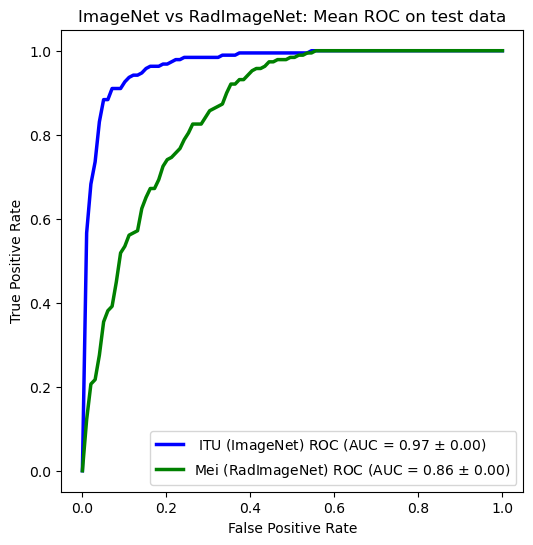

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    ImgNet_mean_tpr,
    color="b",
    label=r" ITU (ImageNet) ROC (AUC = %0.2f $\pm$ %0.2f)" % (ImgNet_mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
ax.plot(
    mean_fpr,
    RadImgNet_mean_tpr,
    color="g",
    label=r"Mei (RadImageNet) ROC (AUC = %0.2f $\pm$ %0.2f)" % (RadImgNet_mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ImageNet vs RadImageNet: Mean ROC on test data",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

Kilde til plot:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

Breast: Ultrasound dataset is collected for the detection of breast cancer (Al-Dhabyani et al., 2020). https://scholar.cu.edu.eg/?q=afahmy/pages/dataset 
- Size: 780
- Classes: 2
- Image size: 256×256
- Batch size: 16

ITU Scores: Mean AUC ± std (both ×100) after fine-tuning on target datasets:
ImageNet:
- No freeze = 94.3 ± 1.7        
- Freeze = 95.1 ± 3.6
- (Mei: ImageNet models demonstrated average AUCs of 0.90±0.10)

RadImageNet:
- No freeze = 91.0 ± 5.2 
- Freeze = 89.4 ± 3.8
- (Mei: RadImageNet models demonstrated average AUCs of 0.94±0.05(P<0.001))


ITU artiklen: "Compared to Mei et al. (2022), we obtained similar AUC values for the knee and breast datasets."

Mei: Breast US showed a 4.0% gain when using Radimagenet (24 simulations)
but Mei?...
- Which model achived the best score?
- Was the during No freeze or freeze or top10-freeze? (No freeze i guess?)

Mei: The RadImageNet models demonstrated higher performance in imaging recognition and consistency
over 24 simulated tuning scenarios regardless of the sample size of the applications.
Within the 24 scenarios, unfreezing
all layers consistently achieved the best performance as compared with unfreezing partial layers and training only fully connected layers. A smaller learning rate at 0.0001 would be suggested when training all trainable parameters to potentially better capture global optimal performance.

Forskelle mellem de to studier:
- Forskellige train/val/test splits
- Resultater fra forskellige modeller (kun ResNet50 i ITU)
- Forskellig træningsstrategi... Mei = 30 epochs vs ITU = optil 300 med early stopping efter 30
- forskellig initial learning rate (ITU = 0.00001) mens den varierede for (Mei, nofreeze = 0.001 og 0.0001; top10Nofreeze = 0.001; freezed = 0.01)
- Forskellig sortering af data, f.eks. ved thyroid dataset... Mei = 349 images vs ITU = 480 images


OBS: ITU: The models were trained for a maximum of 200 epochs, with early stopping after 30 epochs of no decrease in validation loss, saving the models that achieved the lowest validation loss. This was done to prevent overfitting and ensure that the models generalize well to unseen data.... So patience=30??!